In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) 

In [2]:
# 准备数据集
dataset_path="E:\PyProjects\DataSet\FireAI\data_nn_classifier.txt"
df=pd.read_csv(dataset_path,header=None)
print(df.info()) # 加载没有问题
# 原数据集包含有150个样本，每一个样本含有2个features, 一个label
print(df.head())

dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1]
# print(dataset_X.head())
# print(dataset_X.info())
# print(dataset_y.head()) # 检查没问题
dataset_X=dataset_X.values
dataset_y=dataset_y.values
print(dataset_X.shape)
print(dataset_X.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.6 KB
None
      0     1  2
0  1.82  2.04  0
1  3.31  6.78  1
2  6.33  2.55  2
3  2.05  2.47  0
4  4.30  5.25  1
(150, 2)
float64


In [3]:
def visual_2D_dataset(dataset_X,dataset_y):
    '''将二维数据集dataset_X和对应的类别dataset_y显示在散点图中'''
    assert dataset_X.shape[1]==2,'only support dataset with 2 features'
    classes=list(set(dataset_y)) 
    markers=['.',',','o','v','^','<','>','1','2','3','4','8'
             ,'s','p','*','h','H','+','x','D','d','|']
    colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
            'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    plt.figure()
    for class_id in classes:
        one_class=np.array([feature for (feature,label) in 
                   zip(dataset_X,dataset_y) if label==class_id])
        plt.scatter(one_class[:,0],one_class[:,1],marker=markers[class_id%len(markers)],
                    c=colors[class_id%len(colors)],label='class_'+str(class_id))
    plt.legend()

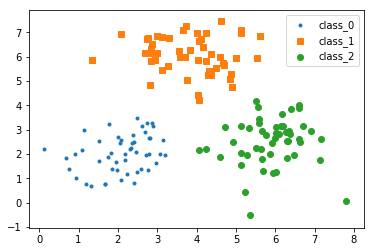

In [4]:
visual_2D_dataset(dataset_X,dataset_y)

In [5]:
# 构建KNN分类模型
from sklearn.neighbors import KNeighborsClassifier
K=10 # 暂定10个最近样本
KNN=KNeighborsClassifier(K,weights='distance')
KNN.fit(dataset_X,dataset_y) # 使用该数据集训练模型


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [6]:
# 将分类器绘制到图中
def plot_classifier(classifier, X, y):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0 # 计算图中坐标的范围
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    step_size = 0.01 # 设置step size
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    # 构建网格数据
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape) 
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', 
                linewidth=1, cmap=plt.cm.Paired)
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])), int(max(X[:, 0])), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])), int(max(X[:, 1])), 1.0)))

    plt.show()


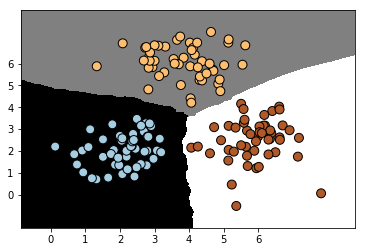

In [7]:
# 查看该KNN分类器在训练集上的分类效果
plot_classifier(KNN, dataset_X,dataset_y)

In [8]:
# 用训练好的KNN模型预测新样本
new_sample=np.array([[4.5,3.6]])
predicted=KNN.predict(new_sample)[0]
print("KNN predicted：{}".format(predicted))

KNN predicted：2


In [9]:
# 为了查看新样本在原数据集中的位置，也为了查看新样本周围最近的K个样本位置，
# 我修改了上面的plot_classifier函数，如下所示：

def plot_classifier2(KNN_classifier, X, y,new_sample,K):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0 # 计算图中坐标的范围
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    step_size = 0.01 # 设置step size
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    # 构建网格数据
    mesh_output = KNN_classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape) 
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', 
                linewidth=1, cmap=plt.cm.Paired)
    # 绘制新样本所在的位置
    plt.scatter(new_sample[:,0],new_sample[:,1],marker='*',color='red')
    # 绘制新样本周围最近的K个样本，只适用于KNN
    # Extract k nearest neighbors
    dist, indices = KNN_classifier.kneighbors(new_sample)
    plt.scatter(dataset_X[indices][0][:][:,0],dataset_X[indices][0][:][:,1],
                marker='x',s=80,color='r')
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])), int(max(X[:, 0])), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])), int(max(X[:, 1])), 1.0)))

    plt.show()


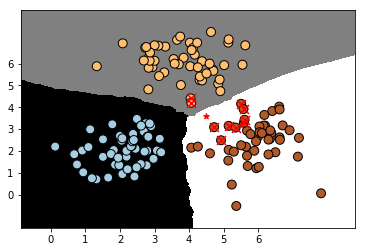

In [10]:
plot_classifier2(KNN,dataset_X,dataset_y,new_sample,K)